In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df1 = df.copy()

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.drop('time', axis = 1, inplace=True)

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, HUE=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 10, 6))
    else:
        plt.figure(figsize=(n + 10, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=HUE,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

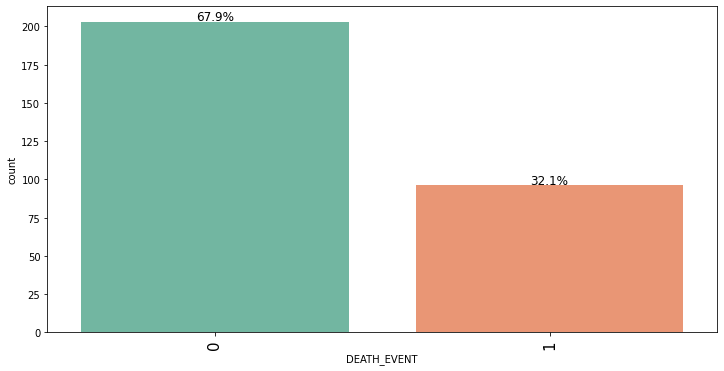

In [ ]:
# checking distribution of target column
labeled_barplot(df,'DEATH_EVENT', perc=True)

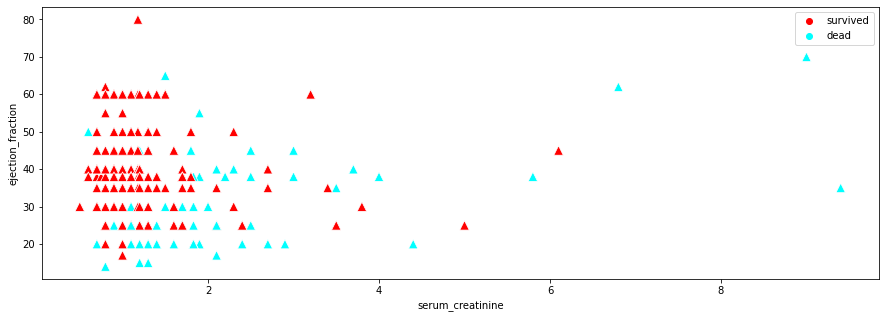

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='serum_creatinine', y='ejection_fraction', data=df, hue="DEATH_EVENT", palette=['red','cyan'], s=90, marker="^")
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['survived', 'dead'])
plt.show()

## Distribution of numerical variables

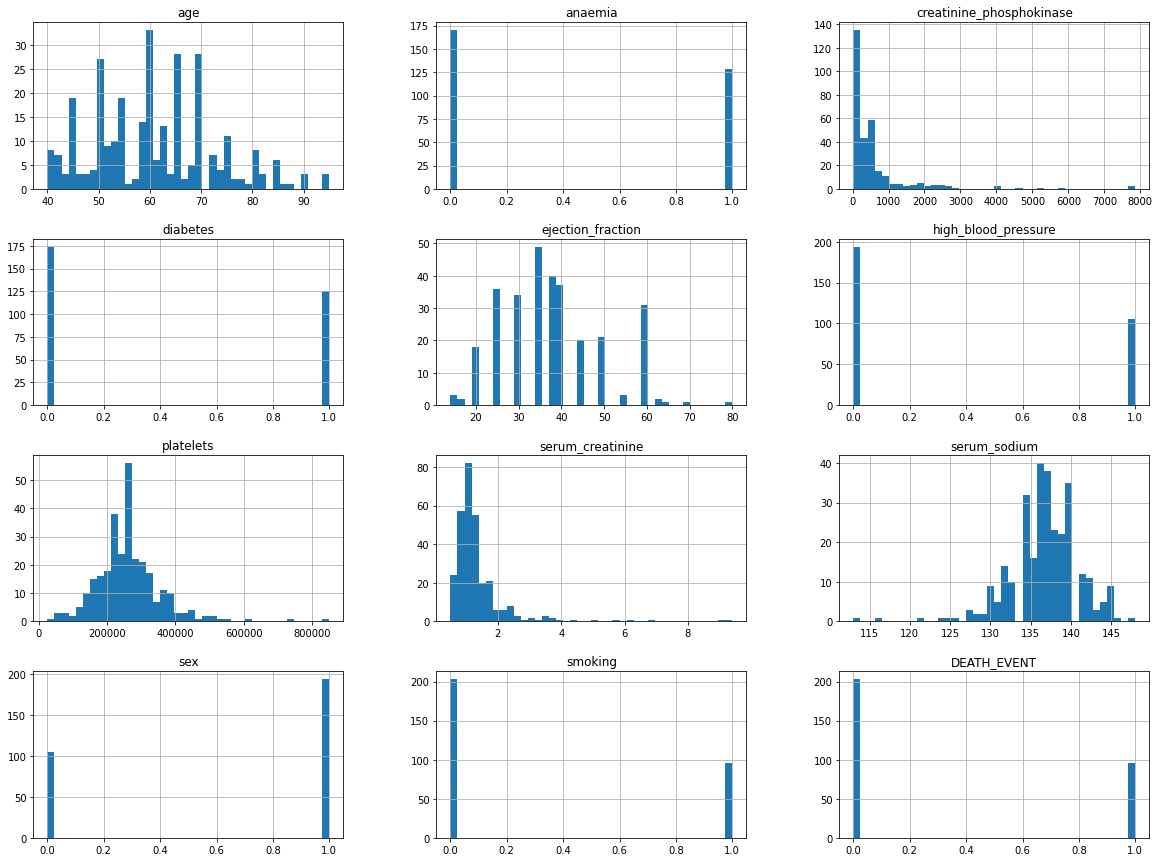

In [ ]:
df.hist(bins=40, figsize=(20,15))
plt.show()

#  Biostatistics Tests

###  Pearson correlation coefficients (PCC)

In [ ]:
PCC = abs(df.corr()['DEATH_EVENT'].values)
dic = {
    'feature' : df.corr()['DEATH_EVENT'].index,
    'abs(PCC)' : PCC
}
pcc_df = pd.DataFrame(dic)[:-1].sort_values(by = 'abs(PCC)',ascending=False).reset_index()
pcc_df = pcc_df.drop('index', axis=1)
print(tabulate(pcc_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+------------+
|    | feature                  |   abs(PCC) |
|----+--------------------------+------------|
|  0 | serum_creatinine         | 0.294278   |
|  1 | ejection_fraction        | 0.268603   |
|  2 | age                      | 0.253729   |
|  3 | serum_sodium             | 0.195204   |
|  4 | high_blood_pressure      | 0.0793511  |
|  5 | anaemia                  | 0.0662701  |
|  6 | creatinine_phosphokinase | 0.0627282  |
|  7 | platelets                | 0.0491389  |
|  8 | smoking                  | 0.0126232  |
|  9 | sex                      | 0.00431638 |
| 10 | diabetes                 | 0.00194288 |
+----+--------------------------+------------+


###  Shapiro–Wilk tests

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro_p = []
for i in df.columns.tolist():
    _, p = shapiro(df[[i]])
    shapiro_p.append(p)

In [ ]:
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : shapiro_p
}
shapiro_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value',ascending=True).reset_index()

shapiro_df = shapiro_df.drop('index', axis=1)
print(tabulate(shapiro_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-------------+
|    | feature                  |     p-value |
|----+--------------------------+-------------|
|  0 | creatinine_phosphokinase | 7.05034e-28 |
|  1 | serum_creatinine         | 5.39276e-27 |
|  2 | smoking                  | 4.58184e-26 |
|  3 | sex                      | 1.1685e-25  |
|  4 | high_blood_pressure      | 1.16862e-25 |
|  5 | diabetes                 | 5.11552e-25 |
|  6 | anaemia                  | 6.20996e-25 |
|  7 | platelets                | 2.88374e-12 |
|  8 | serum_sodium             | 9.21025e-10 |
|  9 | ejection_fraction        | 7.21543e-09 |
| 10 | age                      | 5.35057e-05 |
+----+--------------------------+-------------+


###  Chi squared test

In [ ]:
from scipy.stats import chi2_contingency
chi_p = []
for i in df.columns.tolist():
    data = pd.crosstab(df[i], df['DEATH_EVENT'])
    _, p, _, _ = chi2_contingency(data)
    chi_p.append(round(p,6))

In [ ]:
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : chi_p
}
chi_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value').reset_index()
chi_df = chi_df.drop('index', axis=1)
print(tabulate(chi_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-----------+
|    | feature                  |   p-value |
|----+--------------------------+-----------|
|  0 | ejection_fraction        |  0        |
|  1 | serum_creatinine         |  3e-06    |
|  2 | serum_sodium             |  0.009601 |
|  3 | age                      |  0.015227 |
|  4 | high_blood_pressure      |  0.214103 |
|  5 | anaemia                  |  0.307316 |
|  6 | creatinine_phosphokinase |  0.431751 |
|  7 | platelets                |  0.54827  |
|  8 | diabetes                 |  0.926724 |
|  9 | smoking                  |  0.931765 |
| 10 | sex                      |  0.956051 |
+----+--------------------------+-----------+


###   Mann–Whitney U test

In [ ]:
import scipy.stats as stats
mann_p = []
for i in df.columns.tolist():
    _, p = stats.mannwhitneyu(x=df[i], y=df['DEATH_EVENT'])
    mann_p.append(round(p,7))

In [ ]:
dic = {
    'feature' : df.columns.tolist(),
    'p-value' : mann_p
}
mann_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value').reset_index()
mann_df = mann_df.drop('index', axis=1)
print(tabulate(mann_df, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------+-----------+
|    | feature                  |   p-value |
|----+--------------------------+-----------|
|  0 | age                      | 0         |
|  1 | creatinine_phosphokinase | 0         |
|  2 | ejection_fraction        | 0         |
|  3 | platelets                | 0         |
|  4 | serum_creatinine         | 0         |
|  5 | serum_sodium             | 0         |
|  6 | sex                      | 0         |
|  7 | anaemia                  | 0.002693  |
|  8 | diabetes                 | 0.0070535 |
|  9 | high_blood_pressure      | 0.218234  |
| 10 | smoking                  | 0.499883  |
+----+--------------------------+-----------+


In [ ]:
!pip install mlxtend
# !pip install mlxtend --upgrade
!pip install --upgrade xgboost

In [ ]:
import time
from sklearn.metrics import roc_auc_score, auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import OneRClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)

#   Building Models

In [ ]:
# !pip install --upgrade xgboost

In [ ]:
acc1,acc2,acc3,acc4,acc5,acc6 = [],[],[],[],[],[]
F1,F2,F3,F4,F5,F6 = [],[],[],[],[],[]
roc_AUC1,roc_AUC2,roc_AUC3,roc_AUC4,roc_AUC5,roc_AUC6 = [],[],[],[],[],[]
pr_AUC1,pr_AUC2,pr_AUC3,pr_AUC4,pr_AUC5,pr_AUC6 = [],[],[],[],[],[]
TP_rate1,TP_rate2,TP_rate3,TP_rate4,TP_rate5,TP_rate6 = [],[],[],[],[],[]
TN_rate1,TN_rate2,TN_rate3,TN_rate4,TN_rate5,TN_rate6 = [],[],[],[],[],[]
MCC1,MCC2,MCC3,MCC4,MCC5,MCC6 = [],[],[],[],[],[]

executations = 100
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df.sample(frac=1)
    
    # splitting dataset into 80% for training and 20% for testing
    training_size=int(len(df)*0.8)
    test_size=len(df)-training_size
    train_data=df[0:training_size]
    test_data=df[training_size:]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    
    # applying random forest
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train,y_train)
    prediction_rf = model_rf.predict(X_test)
    
    acc1.append(accuracy_score(y_test, prediction_rf))
    F1.append(f1_score(y_test, prediction_rf))
    roc_AUC1.append(roc_auc_score(y_test, prediction_rf))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_rf) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC1.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_rf).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate1.append(TPR)
    TN_rate1.append(TNR)   
    MCC1.append(matthews_corrcoef(y_test, prediction_rf))    
    
    # applying decision tree
    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train,y_train)
    prediction_dt = model_dt.predict(X_test)
    
    acc2.append(accuracy_score(y_test, prediction_dt))
    F2.append(f1_score(y_test, prediction_dt))
    roc_AUC2.append(roc_auc_score(y_test, prediction_dt))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_dt) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC2.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_dt).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate2.append(TPR)
    TN_rate2.append(TNR)   
    MCC2.append(matthews_corrcoef(y_test, prediction_dt))
    
    # applying gradient boosting
    model_gb = XGBClassifier(eval_metric='mlogloss')
    model_gb.fit(X_train.values,y_train.values)
    prediction_gb = model_gb.predict(X_test.values)
    
    acc3.append(accuracy_score(y_test, prediction_gb))
    F3.append(f1_score(y_test, prediction_gb))
    roc_AUC3.append(roc_auc_score(y_test, prediction_gb))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_gb) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC3.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_gb).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate3.append(TPR)
    TN_rate3.append(TNR)   
    MCC3.append(matthews_corrcoef(y_test, prediction_gb))
    
    # applying linear regression
    model_lr = LogisticRegression()
    model_lr.fit(X_train,y_train)
    prediction_lr = model_lr.predict(X_test)
    
    acc4.append(accuracy_score(y_test, prediction_lr))
    F4.append(f1_score(y_test, prediction_lr))
    roc_AUC4.append(roc_auc_score(y_test, prediction_lr))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_lr) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC4.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_lr).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate4.append(TPR)
    TN_rate4.append(TNR)   
    MCC4.append(matthews_corrcoef(y_test, prediction_lr))
    
    # applying one rule
    model_oner = OneRClassifier()
    model_oner.fit(X_train.values,y_train.values)
    prediction_oner = model_oner.predict(X_test.values)
    
    acc5.append(accuracy_score(y_test, prediction_oner))
    F5.append(f1_score(y_test, prediction_oner))
    roc_AUC5.append(roc_auc_score(y_test, prediction_oner))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_oner) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC5.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_oner).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate5.append(TPR)
    TN_rate5.append(TNR)   
    MCC5.append(matthews_corrcoef(y_test, prediction_oner))
    
    # applying navie bayes
    model_gnb = GaussianNB()
    model_gnb.fit(X_train,y_train)
    prediction_gnb = model_gnb.predict(X_test)
    
    acc6.append(accuracy_score(y_test, prediction_gnb))
    F6.append(f1_score(y_test, prediction_gnb))
    roc_AUC6.append(roc_auc_score(y_test, prediction_gnb))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_gnb) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC6.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_gnb).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate6.append(TPR)
    TN_rate6.append(TNR)   
    MCC6.append(matthews_corrcoef(y_test, prediction_gnb))
    
    print("="*1, end="")
print("done")    

processing====================================================================================================done


##   KNN - hyperparameters tuning

In [ ]:
executations = 100
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in range(executations):
    # shuffle the rows
    df = df.sample(frac=1)
    # splitting dataset into 60% for training,20% for validation and 20% for testing
    training_size=int(len(df)*0.6)
    test_size=int(len(df)*0.2)+1
    val_size=len(df)-training_size - test_size

    train_data=df[0:training_size]
    test_data=df[training_size:(training_size+test_size)]
    val_data=df[(training_size+test_size):]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    X_val = val_data.iloc[:,:-1]
    y_val = val_data.iloc[:,-1]
    
    Kmax = 100
    
    mcc = []
    for k in range(Kmax):
        # applying KNN
        model_knn = KNeighborsClassifier(n_neighbors = k+1)
        model_knn.fit(X_train,y_train)
        prediction_knn = model_knn.predict(X_val) # checking on validation data
        mccoef_ = matthews_corrcoef(y_val, prediction_knn)
        mcc.append((mccoef_,k+1))
        
        
    bestK = max(mcc)[1] # best K in which highest MCC
    print(f"for {i+1} execution : MCC={round(max(mcc)[0],3)}, K={max(mcc)[1]}")
    
    # applying KNN on best K value and checking on test data
    model_knn = KNeighborsClassifier(n_neighbors = bestK)
    model_knn.fit(X_train,y_train)
    prediction = model_knn.predict(X_test)
    
    acc.append(accuracy_score(y_test, prediction))
    F1.append(f1_score(y_test, prediction))
    roc_AUC.append(roc_auc_score(y_test, prediction))
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_test, prediction)
    area = auc(recall, precision)
    pr_AUC.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    TP_rate.append(TPR)
    TN_rate.append(TNR)   
    MCC.append(matthews_corrcoef(y_test, prediction))
print("done")    
KNN_results = [np.mean(MCC),np.mean(F1),np.mean(acc),np.mean(TP_rate),np.mean(TN_rate),np.mean(pr_AUC),np.mean(roc_AUC)]

for 1 execution : MCC=0.084, K=3
for 2 execution : MCC=0.291, K=9
for 3 execution : MCC=0.0, K=100
for 4 execution : MCC=0.262, K=1
for 5 execution : MCC=0.392, K=1
for 6 execution : MCC=0.023, K=1
for 7 execution : MCC=0.201, K=2
for 8 execution : MCC=0.284, K=15
for 9 execution : MCC=0.117, K=2
for 10 execution : MCC=0.154, K=10
for 11 execution : MCC=0.04, K=3
for 12 execution : MCC=0.118, K=6
for 13 execution : MCC=0.177, K=14
for 14 execution : MCC=0.0, K=100
for 15 execution : MCC=0.177, K=12
for 16 execution : MCC=0.0, K=100
for 17 execution : MCC=0.225, K=18
for 18 execution : MCC=0.322, K=12
for 19 execution : MCC=0.149, K=15
for 20 execution : MCC=0.177, K=2
for 21 execution : MCC=0.32, K=2
for 22 execution : MCC=0.244, K=21
for 23 execution : MCC=0.158, K=2
for 24 execution : MCC=0.443, K=5
for 25 execution : MCC=0.173, K=8
for 26 execution : MCC=0.277, K=6
for 27 execution : MCC=0.162, K=4
for 28 execution : MCC=0.194, K=5
for 29 execution : MCC=0.302, K=2
for 30 execution 

##   SVM Linear - hyperparameters tuning

In [ ]:
executations = 100
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in range(executations):
    # shuffle the rows
    df = df.sample(frac=1)
    # splitting dataset into 60% for training,20% for validation and 20% for testing
    training_size=int(len(df)*0.6)
    test_size=int(len(df)*0.2)+1
    val_size=len(df)-training_size - test_size

    train_data=df[0:training_size]
    test_data=df[training_size:(training_size+test_size)]
    val_data=df[(training_size+test_size):]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    X_val = val_data.iloc[:,:-1]
    y_val = val_data.iloc[:,-1]
    
    Kmax = 100
    
    c_val = [0.001, 0.01, 0.1, 1, 10]
    mcc = []
    for C in c_val:
        # applying SVM linear
        model = SVC(C = C, kernel='linear')
        model.fit(X_train,y_train)
        prediction_svmlinear = model.predict(X_val) # checking on validation data
        mccoef_ = matthews_corrcoef(y_val, prediction_svmlinear)
        mcc.append((mccoef_,C))
        
        
    bestC = max(mcc)[1] # best C in which highest MCC
    print(f"for {i+1} execution : MCC={round(max(mcc)[0],3)}, C={max(mcc)[1]}")
    
    # applying SVM linear on best C value and checking on test data
    model = SVC(C = bestC, kernel='linear')
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc.append(accuracy_score(y_test, prediction))
    F1.append(f1_score(y_test, prediction))
    roc_AUC.append(roc_auc_score(y_test, prediction))
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_test, prediction)
    area = auc(recall, precision)
    pr_AUC.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    TP_rate.append(TPR)
    TN_rate.append(TNR)   
    MCC.append(matthews_corrcoef(y_test, prediction))
print("done")    
SVMlinear_results = [np.mean(MCC),np.mean(F1),np.mean(acc),np.mean(TP_rate),np.mean(TN_rate),np.mean(pr_AUC),np.mean(roc_AUC)]

for 1 execution : MCC=0.055, C=10
for 2 execution : MCC=0.509, C=10
for 3 execution : MCC=0.177, C=10
for 4 execution : MCC=0.184, C=1
for 5 execution : MCC=0.091, C=10
for 6 execution : MCC=0.115, C=0.001
for 7 execution : MCC=0.212, C=1
for 8 execution : MCC=0.184, C=1
for 9 execution : MCC=0.0, C=1
for 10 execution : MCC=0.169, C=1
for 11 execution : MCC=0.008, C=1
for 12 execution : MCC=0.253, C=1
for 13 execution : MCC=0.184, C=0.01
for 14 execution : MCC=0.066, C=10
for 15 execution : MCC=0.216, C=0.1
for 16 execution : MCC=0.248, C=0.1
for 17 execution : MCC=0.184, C=1
for 18 execution : MCC=0.073, C=0.001
for 19 execution : MCC=0.066, C=10
for 20 execution : MCC=0.165, C=1
for 21 execution : MCC=0.117, C=1
for 22 execution : MCC=0.073, C=1
for 23 execution : MCC=0.149, C=10
for 24 execution : MCC=0.199, C=10
for 25 execution : MCC=0.105, C=0.1
for 26 execution : MCC=0.284, C=10
for 27 execution : MCC=0.184, C=10
for 28 execution : MCC=0.234, C=10
for 29 execution : MCC=0.169, C

##   SVM Radial - hyperparameters tuning

In [ ]:
executations = 100
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in range(executations):
    # shuffle the rows
    df = df.sample(frac=1)
    # splitting dataset into 60% for training,20% for validation and 20% for testing
    training_size=int(len(df)*0.6)
    test_size=int(len(df)*0.2)+1
    val_size=len(df)-training_size - test_size

    train_data=df[0:training_size]
    test_data=df[training_size:(training_size+test_size)]
    val_data=df[(training_size+test_size):]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    X_val = val_data.iloc[:,:-1]
    y_val = val_data.iloc[:,-1]
    
    Kmax = 100
    
    c_val = [0.001, 0.01, 0.1, 1, 10]
    mcc = []
    for C in c_val:
        # applying SVM Radial
        model = SVC(C = C, kernel='rbf')
        model.fit(X_train,y_train)
        prediction_svmrbf = model.predict(X_val) # checking on validation data
        mccoef_ = matthews_corrcoef(y_val, prediction_svmrbf)
        mcc.append((mccoef_,C))
        
        
    bestC = max(mcc)[1] # best C in which highest MCC
    print(f"for {i+1} execution : MCC={round(max(mcc)[0],3)}, C={max(mcc)[1]}")
    
    # applying SVM linear on best C value and checking on test data
    model = SVC(C = bestC, kernel='rbf')
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc.append(accuracy_score(y_test, prediction))
    F1.append(f1_score(y_test, prediction))
    roc_AUC.append(roc_auc_score(y_test, prediction))
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_test, prediction)
    area = auc(recall, precision)
    pr_AUC.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    TP_rate.append(TPR)
    TN_rate.append(TNR)   
    MCC.append(matthews_corrcoef(y_test, prediction))
print("done")    
SVMradial_results = [np.mean(MCC),np.mean(F1),np.mean(acc),np.mean(TP_rate),np.mean(TN_rate),np.mean(pr_AUC),np.mean(roc_AUC)]

for 1 execution : MCC=0.0, C=10
for 2 execution : MCC=0.0, C=10
for 3 execution : MCC=0.0, C=10
for 4 execution : MCC=0.0, C=10
for 5 execution : MCC=0.0, C=10
for 6 execution : MCC=0.0, C=10
for 7 execution : MCC=0.0, C=10
for 8 execution : MCC=0.0, C=1
for 9 execution : MCC=0.0, C=10
for 10 execution : MCC=0.0, C=10
for 11 execution : MCC=0.0, C=10
for 12 execution : MCC=0.0, C=10
for 13 execution : MCC=0.0, C=10
for 14 execution : MCC=0.0, C=10
for 15 execution : MCC=0.0, C=10
for 16 execution : MCC=0.0, C=10
for 17 execution : MCC=0.0, C=10
for 18 execution : MCC=0.0, C=10
for 19 execution : MCC=0.0, C=10
for 20 execution : MCC=0.0, C=1
for 21 execution : MCC=0.0, C=1
for 22 execution : MCC=0.0, C=10
for 23 execution : MCC=0.025, C=10
for 24 execution : MCC=0.0, C=10
for 25 execution : MCC=0.0, C=1
for 26 execution : MCC=0.0, C=10
for 27 execution : MCC=0.0, C=10
for 28 execution : MCC=0.0, C=10
for 29 execution : MCC=0.0, C=1
for 30 execution : MCC=0.0, C=10
for 31 execution : MCC

##   Neural Network - hyperparameters tuning

In [ ]:
executations = 100
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in range(executations):
    # shuffle the rows
    df = df.sample(frac=1)
    # splitting dataset into 60% for training,20% for validation and 20% for testing
    training_size=int(len(df)*0.6)
    test_size=int(len(df)*0.2)+1
    val_size=len(df)-training_size - test_size

    train_data=df[0:training_size]
    test_data=df[training_size:(training_size+test_size)]
    val_data=df[(training_size+test_size):]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    X_val = val_data.iloc[:,:-1]
    y_val = val_data.iloc[:,-1]
    
    hidden_layer = 100
    hidden_units = 100
    mcc = []
    for hidden_layer in range(hidden_layer):
        # applying MLP neural network
        model = MLPClassifier(hidden_layer_sizes = (hidden_layer+1,100))
        model.fit(X_train,y_train)
        prediction = model.predict(X_val) # checking on validation data
        mccoef_ = matthews_corrcoef(y_val, prediction)
        mcc.append((mccoef_,hidden_layer+1))
        
        
    bestHiddenLayerSize = max(mcc)[1] # best bestHiddenLayerSize in which highest MCC
    print(f"for {i+1} execution : MCC={round(max(mcc)[0],3)}, hidden layer ={max(mcc)[1]}")
    
    # applying MLP on best K value and checking on test data
    model = MLPClassifier(hidden_layer_sizes = (bestHiddenLayerSize,100))
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc.append(accuracy_score(y_test, prediction))
    F1.append(f1_score(y_test, prediction))
    roc_AUC.append(roc_auc_score(y_test, prediction))
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds = precision_recall_curve(y_test, prediction)
    area = auc(recall, precision)
    pr_AUC.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    TP_rate.append(TPR)
    TN_rate.append(TNR)   
    MCC.append(matthews_corrcoef(y_test, prediction))
print("done")    
neural_network_results = [np.mean(MCC),np.mean(F1),np.mean(acc),np.mean(TP_rate),np.mean(TN_rate),np.mean(pr_AUC),np.mean(roc_AUC)]

for 1 execution : MCC=0.117, hidden layer =90
for 2 execution : MCC=0.293, hidden layer =58
for 3 execution : MCC=0.253, hidden layer =26
for 4 execution : MCC=0.082, hidden layer =98
for 5 execution : MCC=0.189, hidden layer =73
for 6 execution : MCC=0.088, hidden layer =20
for 7 execution : MCC=0.184, hidden layer =97
for 8 execution : MCC=0.131, hidden layer =68
for 9 execution : MCC=0.162, hidden layer =17
for 10 execution : MCC=0.207, hidden layer =93
for 11 execution : MCC=0.199, hidden layer =18
for 12 execution : MCC=0.177, hidden layer =79
for 13 execution : MCC=0.177, hidden layer =6
for 14 execution : MCC=0.191, hidden layer =58
for 15 execution : MCC=0.225, hidden layer =77
for 16 execution : MCC=0.051, hidden layer =44
for 17 execution : MCC=0.131, hidden layer =42
for 18 execution : MCC=0.229, hidden layer =73
for 19 execution : MCC=0.207, hidden layer =80
for 20 execution : MCC=0.247, hidden layer =9
for 21 execution : MCC=0.082, hidden layer =32
for 22 execution : MCC=0

In [ ]:
random_forest_results = [np.mean(MCC1),np.mean(F1),np.mean(acc1),np.mean(TP_rate1),np.mean(TN_rate1),np.mean(pr_AUC1),np.mean(roc_AUC1)]
decision_trees_results = [np.mean(MCC2),np.mean(F2),np.mean(acc2),np.mean(TP_rate2),np.mean(TN_rate2),np.mean(pr_AUC2),np.mean(roc_AUC2)]
gradient_boosting_results = [np.mean(MCC3),np.mean(F3),np.mean(acc3),np.mean(TP_rate3),np.mean(TN_rate3),np.mean(pr_AUC3),np.mean(roc_AUC3)]
linear_regression_results = [np.mean(MCC4),np.mean(F4),np.mean(acc4),np.mean(TP_rate4),np.mean(TN_rate4),np.mean(pr_AUC4),np.mean(roc_AUC4)]
one_rule_results = [np.mean(MCC5),np.mean(F5),np.mean(acc5),np.mean(TP_rate5),np.mean(TN_rate5),np.mean(pr_AUC5),np.mean(roc_AUC5)]
GaussianNB_results = [np.mean(MCC6),np.mean(F6),np.mean(acc6),np.mean(TP_rate6),np.mean(TN_rate6),np.mean(pr_AUC6),np.mean(roc_AUC6)]

models = [random_forest_results,decision_trees_results,gradient_boosting_results,linear_regression_results, one_rule_results,GaussianNB_results,neural_network_results,SVMradial_results,SVMlinear_results,KNN_results]
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in models:
    MCC.append(round(i[0],3))
    F1.append(round(i[1],3))    
    acc.append(round(i[2],3))    
    TP_rate.append(round(i[3],3))    
    TN_rate.append(round(i[4],3))   
    pr_AUC.append(round(i[5],3)) 
    roc_AUC.append(round(i[6],3))    

# showing all models result
dic = {
    'Method':['Random Forests','Decision tree', 'Gradient boosting','Linear regression', 'One rule', 'Naïve bayes','Artificial neural network','SVM radial','SVM linear','k-nearest neighbors'],
    'MCC' : MCC,
    'F1 score' : F1,
    'Accuracy' : acc,
    'TP rate' : TP_rate,
    'TN rate' : TN_rate,
    'PR AUC' : pr_AUC,
    'ROC AUC' : roc_AUC,
    

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Method')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))
   

+---------------------------+--------+------------+------------+-----------+-----------+----------+-----------+
| Method                    |    MCC |   F1 score |   Accuracy |   TP rate |   TN rate |   PR AUC |   ROC AUC |
|---------------------------+--------+------------+------------+-----------+-----------+----------+-----------|
| Random Forests            |  0.361 |      0.521 |      0.737 |     0.467 |     0.865 |    0.628 |     0.666 |
| Decision tree             |  0.258 |      0.483 |      0.678 |     0.485 |     0.77  |    0.574 |     0.628 |
| Gradient boosting         |  0.343 |      0.525 |      0.723 |     0.5   |     0.829 |    0.619 |     0.664 |
| Linear regression         |  0.337 |      0.457 |      0.738 |     0.365 |     0.912 |    0.615 |     0.638 |
| One rule                  | -0.043 |      0.041 |      0.66  |     0.024 |     0.956 |    0.329 |     0.49  |
| Naïve bayes               |  0.211 |      0.307 |      0.703 |     0.22  |     0.929 |    0.529 |     

##   Random Forests Feature Selection

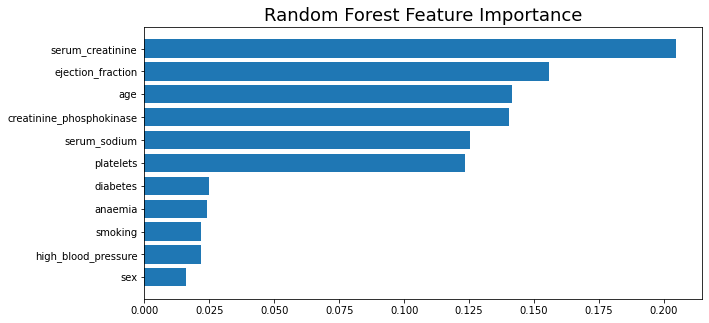

In [ ]:
# extracting dependent and independent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# evaluating the model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance", fontsize=18)
plt.show()

##        Survival prediction results on serum creatinine and ejection fraction – mean of 100 executions

In [ ]:
acc1,acc3,acc4 = [],[],[]
F1,F3,F4 = [],[],[]
roc_AUC1,roc_AUC3,roc_AUC4 = [],[],[]
pr_AUC1,pr_AUC3,pr_AUC4 = [],[],[]
TP_rate1,TP_rate3,TP_rate4 = [],[],[]
TN_rate1,TN_rate3,TN_rate4 = [],[],[]
MCC1,MCC3,MCC4 = [],[],[]

df_new = df[['ejection_fraction','serum_creatinine','DEATH_EVENT']]

executations = 100
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df_new.sample(frac=1)
    
    # splitting dataset into 80% for training and 20% for testing
    training_size=int(len(df)*0.8)
    test_size=len(df)-training_size
    train_data=df[0:training_size]
    test_data=df[training_size:]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    
    # applying random forest
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train,y_train)
    prediction_rf = model_rf.predict(X_test)
    
    acc1.append(accuracy_score(y_test, prediction_rf))
    F1.append(f1_score(y_test, prediction_rf))
    roc_AUC1.append(roc_auc_score(y_test, prediction_rf))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_rf) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC1.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_rf).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate1.append(TPR)
    TN_rate1.append(TNR)   
    MCC1.append(matthews_corrcoef(y_test, prediction_rf))    
    
    # applying gradient boosting
    model_gb = XGBClassifier(eval_metric='mlogloss')
    model_gb.fit(X_train.values,y_train.values)
    prediction_gb = model_gb.predict(X_test.values)
    
    acc3.append(accuracy_score(y_test, prediction_gb))
    F3.append(f1_score(y_test, prediction_gb))
    roc_AUC3.append(roc_auc_score(y_test, prediction_gb))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_gb) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC3.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_gb).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate3.append(TPR)
    TN_rate3.append(TNR)   
    MCC3.append(matthews_corrcoef(y_test, prediction_gb))
    
    # applying SVM radial
    model = SVC(kernel='rbf')
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc4.append(accuracy_score(y_test, prediction))
    F4.append(f1_score(y_test, prediction))
    roc_AUC4.append(roc_auc_score(y_test, prediction))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC4.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate4.append(TPR)
    TN_rate4.append(TNR)   
    MCC4.append(matthews_corrcoef(y_test, prediction))
    
    
    
    print("="*1, end="")
print("done")    

processing====================================================================================================done


In [ ]:
random_forest_results = [np.mean(MCC1),np.mean(F1),np.mean(acc1),np.mean(TP_rate1),np.mean(TN_rate1),np.mean(pr_AUC1),np.mean(roc_AUC1)]
gradient_boosting_results = [np.mean(MCC3),np.mean(F3),np.mean(acc3),np.mean(TP_rate3),np.mean(TN_rate3),np.mean(pr_AUC3),np.mean(roc_AUC3)]
SVMradial_results = [np.mean(MCC4),np.mean(F4),np.mean(acc4),np.mean(TP_rate4),np.mean(TN_rate4),np.mean(pr_AUC4),np.mean(roc_AUC4)]

models = [random_forest_results,gradient_boosting_results, SVMradial_results]
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in models:
    MCC.append(round(i[0],3))
    F1.append(round(i[1],3))    
    acc.append(round(i[2],3))    
    TP_rate.append(round(i[3],3))    
    TN_rate.append(round(i[4],3))   
    pr_AUC.append(round(i[5],3)) 
    roc_AUC.append(round(i[6],3))    
   

# showing all models result
dic = {
    'Method':['Random Forests', 'Gradient boosting','SVM radial'],
    'MCC' : MCC,
    'F1 score' : F1,
    'Accuracy' : acc,
    'TP rate' : TP_rate,
    'TN rate' : TN_rate,
    'PR AUC' : pr_AUC,
    'ROC AUC' : roc_AUC,
    

}
metrics_df_2 = pd.DataFrame(dic)

metrics_df_2 = metrics_df_2.set_index('Method')
# displaying the DataFrame
print(tabulate(metrics_df_2, headers = 'keys', tablefmt = 'psql'))

+-------------------+-------+------------+------------+-----------+-----------+----------+-----------+
| Method            |   MCC |   F1 score |   Accuracy |   TP rate |   TN rate |   PR AUC |   ROC AUC |
|-------------------+-------+------------+------------+-----------+-----------+----------+-----------|
| Random Forests    | 0.405 |      0.582 |      0.742 |     0.584 |     0.818 |    0.658 |     0.701 |
| Gradient boosting | 0.407 |      0.576 |      0.748 |     0.556 |     0.839 |    0.657 |     0.698 |
| SVM radial        | 0.322 |      0.415 |      0.728 |     0.316 |     0.923 |    0.622 |     0.619 |
+-------------------+-------+------------+------------+-----------+-----------+----------+-----------+


##        Survival prediction results including the follow-up time – mean of 100 executions

In [ ]:
acc4,acc5 = [],[]
F4,F5 = [],[]
roc_AUC4,roc_AUC5 = [],[]
pr_AUC4,pr_AUC5 = [],[]
TP_rate4,TP_rate5 = [],[]
TN_rate4,TN_rate5 = [],[]
MCC4,MCC5 = [],[]

# select 3 features for logistic regression
df_ = df1[['ejection_fraction','serum_creatinine','time','DEATH_EVENT']]

executations = 100
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df_.sample(frac=1)
    
    # splitting dataset into 80% for training and 20% for testing
    training_size=int(len(df)*0.8)
    test_size=len(df)-training_size
    train_data=df[0:training_size]
    test_data=df[training_size:]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    
    # applying Logistic regression
    model_lr = LogisticRegression()
    model_lr.fit(X_train,y_train)
    prediction_lr = model_lr.predict(X_test)
    
    acc4.append(accuracy_score(y_test, prediction_lr))
    F4.append(f1_score(y_test, prediction_lr))
    roc_AUC4.append(roc_auc_score(y_test, prediction_lr))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_lr) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC4.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_lr).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate4.append(TPR)
    TN_rate4.append(TNR)   
    MCC4.append(matthews_corrcoef(y_test, prediction_lr))
    
    
    print("="*1, end="")
print("done")    
##########################################################################################################################
# select all features for logistic regression
executations = 100
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df1.sample(frac=1)
    
    # splitting dataset into 80% for training and 20% for testing
    training_size=int(len(df)*0.8)
    test_size=len(df)-training_size
    train_data=df[0:training_size]
    test_data=df[training_size:]

    X_train = train_data.iloc[:,:-1]
    y_train = train_data.iloc[:,-1]
    X_test = test_data.iloc[:,:-1]
    y_test = test_data.iloc[:,-1] 
    
    # applying Logistic regression
    model_lr = LogisticRegression()
    model_lr.fit(X_train,y_train)
    prediction_lr = model_lr.predict(X_test)
    
    acc5.append(accuracy_score(y_test, prediction_lr))
    F5.append(f1_score(y_test, prediction_lr))
    roc_AUC5.append(roc_auc_score(y_test, prediction_lr))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_lr) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC5.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_lr).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate5.append(TPR)
    TN_rate5.append(TNR)   
    MCC5.append(matthews_corrcoef(y_test, prediction_lr))
    
    
    print("="*1, end="")
print("done")    

processing====================================================================================================done
processing====================================================================================================done


In [ ]:
lr_results_3 = [np.mean(MCC4),np.mean(F4),np.mean(acc4),np.mean(TP_rate4),np.mean(TN_rate4),np.mean(pr_AUC4),np.mean(roc_AUC4)]
lr_results_all = [np.mean(MCC5),np.mean(F5),np.mean(acc5),np.mean(TP_rate5),np.mean(TN_rate5),np.mean(pr_AUC5),np.mean(roc_AUC5)]

models = [lr_results_3,lr_results_all]
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in models:
    MCC.append(round(i[0],3))
    F1.append(round(i[1],3))    
    acc.append(round(i[2],3))    
    TP_rate.append(round(i[3],3))    
    TN_rate.append(round(i[4],3))   
    pr_AUC.append(round(i[5],3)) 
    roc_AUC.append(round(i[6],3))    
   

# showing all models result
dic = {
    'Method':['Logistic regression (EF, SR, & FU)', 'Logistic regression (all features)'],
    'MCC' : MCC,
    'F1 score' : F1,
    'Accuracy' : acc,
    'TP rate' : TP_rate,
    'TN rate' : TN_rate,
    'PR AUC' : pr_AUC,
    'ROC AUC' : roc_AUC,
    

}
metrics_df_lr = pd.DataFrame(dic)

metrics_df_lr = metrics_df_lr.set_index('Method')
# displaying the DataFrame
print(tabulate(metrics_df_lr, headers = 'keys', tablefmt = 'psql'))

+------------------------------------+-------+------------+------------+-----------+-----------+----------+-----------+
| Method                             |   MCC |   F1 score |   Accuracy |   TP rate |   TN rate |   PR AUC |   ROC AUC |
|------------------------------------+-------+------------+------------+-----------+-----------+----------+-----------|
| Logistic regression (EF, SR, & FU) | 0.59  |      0.703 |      0.825 |     0.66  |     0.906 |    0.769 |     0.783 |
| Logistic regression (all features) | 0.564 |      0.679 |      0.817 |     0.634 |     0.904 |    0.751 |     0.769 |
+------------------------------------+-------+------------+------------+-----------+-----------+----------+-----------+


#        Proposed Solution

##        Checking Multicollinearity

We can identify which variables are affected by multicollinearity and the strength of the correlation. Fortunately, there is a very simple test to assess multicollinearity. The variance inflation factor (VIF) identifies correlation between independent variables and the strength of that correlation.

Statistical software calculates a VIF for each independent variable. VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [ ]:
calc_vif(df1)

,variables,VIF
0,age,30.400689
1,anaemia,1.910127
2,creatinine_phosphokinase,1.458680
3,diabetes,1.793319
4,ejection_fraction,13.355059
5,high_blood_pressure,1.646768
6,platelets,8.644291
7,serum_creatinine,3.132862
8,serum_sodium,61.551253
9,sex,3.810980


In [ ]:
# so, we will remove the age and serum_sodium variable becuase its showing high multicollinearity
df1.drop(['age','serum_sodium'], axis = 1, inplace=True)

In [ ]:
calc_vif(df1)

,variables,VIF
0,anaemia,1.797203
1,creatinine_phosphokinase,1.422024
2,diabetes,1.752614
3,ejection_fraction,7.914638
4,high_blood_pressure,1.572163
5,platelets,7.022870
6,serum_creatinine,3.051262
7,sex,3.292591
8,smoking,1.890115
9,time,4.163544


So, we will choose the variables that we are get from VIF technique

# Dealing with Imbalanced Data - Synthetic Minority Oversampling Technique (SMOTE) 

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [ ]:
acc1,acc3,acc4 = [],[],[]
F1,F3,F4 = [],[],[]
roc_AUC1,roc_AUC3,roc_AUC4 = [],[],[]
pr_AUC1,pr_AUC3,pr_AUC4 = [],[],[]
TP_rate1,TP_rate3,TP_rate4 = [],[],[]
TN_rate1,TN_rate3,TN_rate4 = [],[],[]
MCC1,MCC3,MCC4 = [],[],[]

std_ = StandardScaler()  # create an object for standard scaling

executations = 70
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df1.sample(frac=1)
    
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]

    #SMOTE apply for unbalanced data
    smote = SMOTE(sampling_strategy='minority')
    X_smote, Y_smote = smote.fit_sample(X,Y) 
    
    # splitting dataset into 70% for training and 30% for testing
    X_train, X_test, y_train, y_test = train_test_split(X_smote,Y_smote, test_size = 0.3, random_state = 0, shuffle=False,stratify=None) 
    
    X_train= std_.fit_transform(X_train)  # standarize the data
    X_test= std_.transform(X_test) 
    
    # applying bagging
    base_estimator = DecisionTreeClassifier()
    model_rf = BaggingClassifier(base_estimator = base_estimator)
    model_rf.fit(X_train,y_train)
    prediction_rf = model_rf.predict(X_test)
    
    acc1.append(accuracy_score(y_test, prediction_rf))
    F1.append(f1_score(y_test, prediction_rf))
    roc_AUC1.append(roc_auc_score(y_test, prediction_rf))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_rf) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC1.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_rf).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate1.append(TPR)
    TN_rate1.append(TNR)   
    MCC1.append(matthews_corrcoef(y_test, prediction_rf))    
    
    # applying boosting
    base_estimator = DecisionTreeClassifier()
    model_gb = AdaBoostClassifier(base_estimator = base_estimator)
    model_gb.fit(X_train,y_train)
    prediction_gb = model_gb.predict(X_test)
    
    acc3.append(accuracy_score(y_test, prediction_gb))
    F3.append(f1_score(y_test, prediction_gb))
    roc_AUC3.append(roc_auc_score(y_test, prediction_gb))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_gb) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC3.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_gb).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate3.append(TPR)
    TN_rate3.append(TNR)   
    MCC3.append(matthews_corrcoef(y_test, prediction_gb))
    
    # applying stacking
    # evaluating the model
    base_estimator = [
      ('rf', RandomForestClassifier())
    ]
    model = StackingClassifier(estimators=base_estimator, final_estimator=LogisticRegression())
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc4.append(accuracy_score(y_test, prediction))
    F4.append(f1_score(y_test, prediction))
    roc_AUC4.append(roc_auc_score(y_test, prediction))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC4.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate4.append(TPR)
    TN_rate4.append(TNR)   
    MCC4.append(matthews_corrcoef(y_test, prediction))
    
    
    
    print("="*1, end="")
print("done")    

processing======================================================================done


In [ ]:
bagging_results = [np.mean(MCC1),np.mean(F1),np.mean(acc1),np.mean(TP_rate1),np.mean(TN_rate1),np.mean(pr_AUC1),np.mean(roc_AUC1)]
boosting_results = [np.mean(MCC3),np.mean(F3),np.mean(acc3),np.mean(TP_rate3),np.mean(TN_rate3),np.mean(pr_AUC3),np.mean(roc_AUC3)]
stacking_results = [np.mean(MCC4),np.mean(F4),np.mean(acc4),np.mean(TP_rate4),np.mean(TN_rate4),np.mean(pr_AUC4),np.mean(roc_AUC4)]

models = [bagging_results,boosting_results, boosting_results]
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in models:
    MCC.append(round(i[0],3))
    F1.append(round(i[1],3))    
    acc.append(round(i[2],3))    
    TP_rate.append(round(i[3],3))    
    TN_rate.append(round(i[4],3))   
    pr_AUC.append(round(i[5],3)) 
    roc_AUC.append(round(i[6],3))    
   

# showing all models result
dic = {
    'Method':['Bagging(SMOTE)', 'Boosting(SMOTE)','Stacking(SMOTE)'],
    'MCC' : MCC,
    'F1 score' : F1,
    'Accuracy' : acc,
    'TP rate' : TP_rate,
    'TN rate' : TN_rate,
    'PR AUC' : pr_AUC,
    'ROC AUC' : roc_AUC,
    

}
metrics_df_3 = pd.DataFrame(dic)

metrics_df_3 = metrics_df_3.set_index('Method')
# displaying the DataFrame
print("Results by using SMOTE technique for balance the data (mean 70 executions)")
print(tabulate(metrics_df_3, headers = 'keys', tablefmt = 'psql'))

Results by using SMOTE technique for balance the data (mean 70 executions)
+-----------------+-------+------------+------------+-----------+-----------+----------+-----------+
| Method          |   MCC |   F1 score |   Accuracy |   TP rate |   TN rate |   PR AUC |   ROC AUC |
|-----------------+-------+------------+------------+-----------+-----------+----------+-----------|
| Bagging(SMOTE)  | 0.431 |      0.877 |      0.798 |     0.79  |     0.885 |    0.984 |     0.838 |
| Boosting(SMOTE) | 0.437 |      0.894 |      0.824 |     0.823 |     0.834 |    0.983 |     0.829 |
| Stacking(SMOTE) | 0.437 |      0.894 |      0.824 |     0.823 |     0.834 |    0.983 |     0.829 |
+-----------------+-------+------------+------------+-----------+-----------+----------+-----------+


#  Dealing with Imbalanced Data - RandomOverSampler 

In [ ]:
acc1,acc3,acc4 = [],[],[]
F1,F3,F4 = [],[],[]
roc_AUC1,roc_AUC3,roc_AUC4 = [],[],[]
pr_AUC1,pr_AUC3,pr_AUC4 = [],[],[]
TP_rate1,TP_rate3,TP_rate4 = [],[],[]
TN_rate1,TN_rate3,TN_rate4 = [],[],[]
MCC1,MCC3,MCC4 = [],[],[]

std_ = StandardScaler()  # create an object for standard scaling

executations = 70
print("processing", end="")
for i in range(executations):
    
    # shuffle the rows
    df = df1.sample(frac=1)
    
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]

    #RandomOverSampler apply for unbalanced data
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, Y_over = oversample.fit_sample(X,Y) 
    
    # splitting dataset into 70% for training and 30% for testing
    X_train, X_test, y_train, y_test = train_test_split(X_over,Y_over, test_size = 0.3, random_state = 0, shuffle=False,stratify=None) 
    
    X_train= std_.fit_transform(X_train)  # standarize the data
    X_test= std_.transform(X_test) 
    
    # applying bagging
    base_estimator = DecisionTreeClassifier()
    model_rf = BaggingClassifier(base_estimator = base_estimator)
    model_rf.fit(X_train,y_train)
    prediction_rf = model_rf.predict(X_test)
    
    acc1.append(accuracy_score(y_test, prediction_rf))
    F1.append(f1_score(y_test, prediction_rf))
    roc_AUC1.append(roc_auc_score(y_test, prediction_rf))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_rf) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC1.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_rf).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate1.append(TPR)
    TN_rate1.append(TNR)   
    MCC1.append(matthews_corrcoef(y_test, prediction_rf))    
    
    # applying boosting
    base_estimator = DecisionTreeClassifier()
    model_gb = AdaBoostClassifier(base_estimator = base_estimator)
    model_gb.fit(X_train,y_train)
    prediction_gb = model_gb.predict(X_test)
    
    acc3.append(accuracy_score(y_test, prediction_gb))
    F3.append(f1_score(y_test, prediction_gb))
    roc_AUC3.append(roc_auc_score(y_test, prediction_gb))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction_gb) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC3.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction_gb).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate3.append(TPR)
    TN_rate3.append(TNR)   
    MCC3.append(matthews_corrcoef(y_test, prediction_gb))
    
    # applying stacking
    base_estimator = [
      ('rf', RandomForestClassifier())
    ]
    model = StackingClassifier(estimators=base_estimator, final_estimator=LogisticRegression())
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    acc4.append(accuracy_score(y_test, prediction))
    F4.append(f1_score(y_test, prediction))
    roc_AUC4.append(roc_auc_score(y_test, prediction))
    precision, recall, thresholds = precision_recall_curve(y_test, prediction) # Compute Precision-Recall and plot curve
    area = auc(recall, precision)
    pr_AUC4.append(area)
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()       
    TPR = TP/(TP+FN) # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN/(TN+FP) # Specificity or true negative rate
    TP_rate4.append(TPR)
    TN_rate4.append(TNR)   
    MCC4.append(matthews_corrcoef(y_test, prediction))
    
    
    
    print("="*1, end="")
print("done")    

processing======================================================================done


In [ ]:
bagging_results = [np.mean(MCC1),np.mean(F1),np.mean(acc1),np.mean(TP_rate1),np.mean(TN_rate1),np.mean(pr_AUC1),np.mean(roc_AUC1)]
boosting_results = [np.mean(MCC3),np.mean(F3),np.mean(acc3),np.mean(TP_rate3),np.mean(TN_rate3),np.mean(pr_AUC3),np.mean(roc_AUC3)]
stacking_results = [np.mean(MCC4),np.mean(F4),np.mean(acc4),np.mean(TP_rate4),np.mean(TN_rate4),np.mean(pr_AUC4),np.mean(roc_AUC4)]

models = [bagging_results,boosting_results, boosting_results]
acc = []
F1 = []
roc_AUC = []
pr_AUC = []
TP_rate = []
TN_rate = []
MCC = []
for i in models:
    MCC.append(round(i[0],3))
    F1.append(round(i[1],3))    
    acc.append(round(i[2],3))    
    TP_rate.append(round(i[3],3))    
    TN_rate.append(round(i[4],3))   
    pr_AUC.append(round(i[5],3)) 
    roc_AUC.append(round(i[6],3))    
   

# showing all models result
dic = {
    'Method':['Bagging (RandomOverSampler)', 'Boosting (RandomOverSampler)','Stacking (RandomOverSampler)'],
    'MCC' : MCC,
    'F1 score' : F1,
    'Accuracy' : acc,
    'TP rate' : TP_rate,
    'TN rate' : TN_rate,
    'PR AUC' : pr_AUC,
    'ROC AUC' : roc_AUC,
    

}
metrics_df_3 = pd.DataFrame(dic)

metrics_df_3 = metrics_df_3.set_index('Method')
# displaying the DataFrame
print("Results by using RANDOM_OVER_SAMPLE technique for balance the data (mean 70 executions)")
print(tabulate(metrics_df_3, headers = 'keys', tablefmt = 'psql'))

Results by using RANDOM_OVER_SAMPLE technique for balance the data (mean 70 executions)
+------------------------------+-------+------------+------------+-----------+-----------+----------+-----------+
| Method                       |   MCC |   F1 score |   Accuracy |   TP rate |   TN rate |   PR AUC |   ROC AUC |
|------------------------------+-------+------------+------------+-----------+-----------+----------+-----------|
| Bagging (RandomOverSampler)  | 0.692 |      0.961 |      0.931 |     0.933 |     0.909 |    0.993 |     0.921 |
| Boosting (RandomOverSampler) | 0.749 |      0.974 |      0.954 |     0.965 |     0.846 |    0.991 |     0.905 |
| Stacking (RandomOverSampler) | 0.749 |      0.974 |      0.954 |     0.965 |     0.846 |    0.991 |     0.905 |
+------------------------------+-------+------------+------------+-----------+-----------+----------+-----------+
